# Predicting Employee Attrition

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing database

In [6]:
pea_csv = pd.read_csv('HR-Employee-Attrition.csv')

In [7]:
pea_csv.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploring Dataset

In [9]:
pea_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
pea_csv.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
pea_csv.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Data Visualization

### Heatmap showing the correlation of features

In [21]:
pea_csv2 = pd.get_dummies(pea_csv)

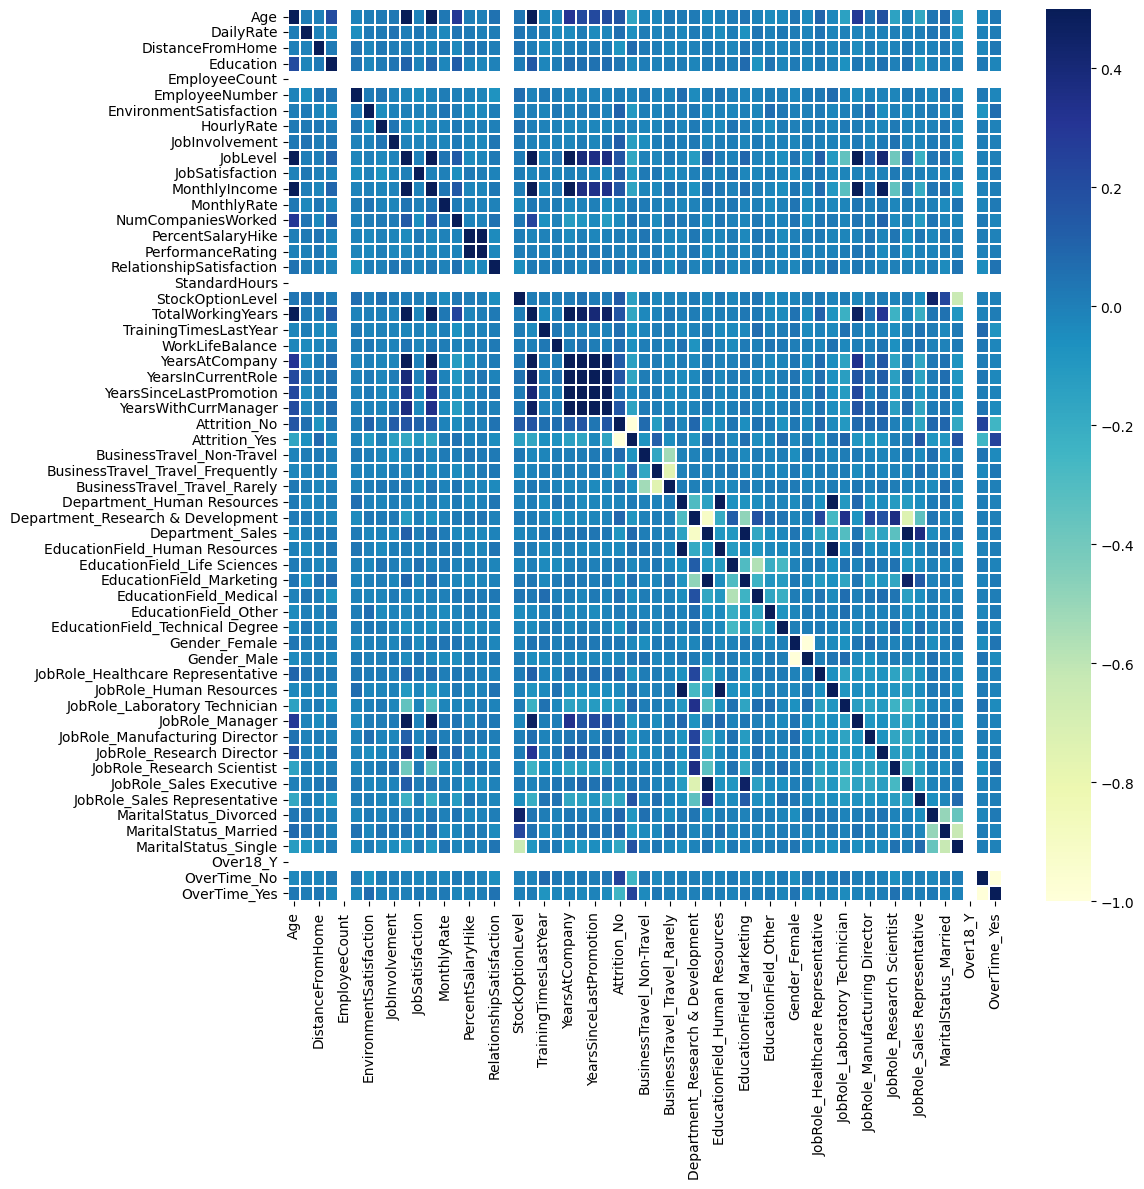

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(pea_csv2.corr(), vmax=0.5, linewidths=0.2, cmap='YlGnBu')
plt.tight_layout()
plt.show()

<Axes: xlabel='Attrition', ylabel='count'>

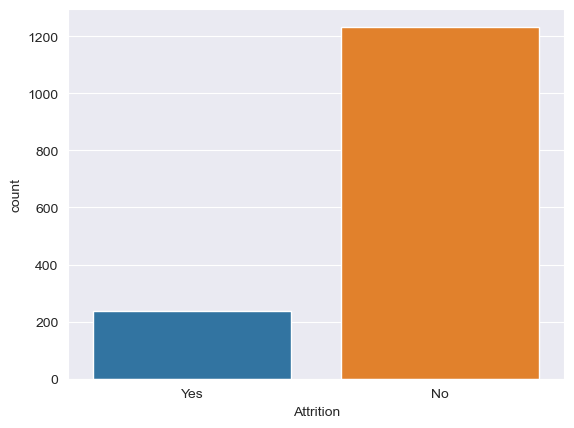

In [24]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data=pea_csv)

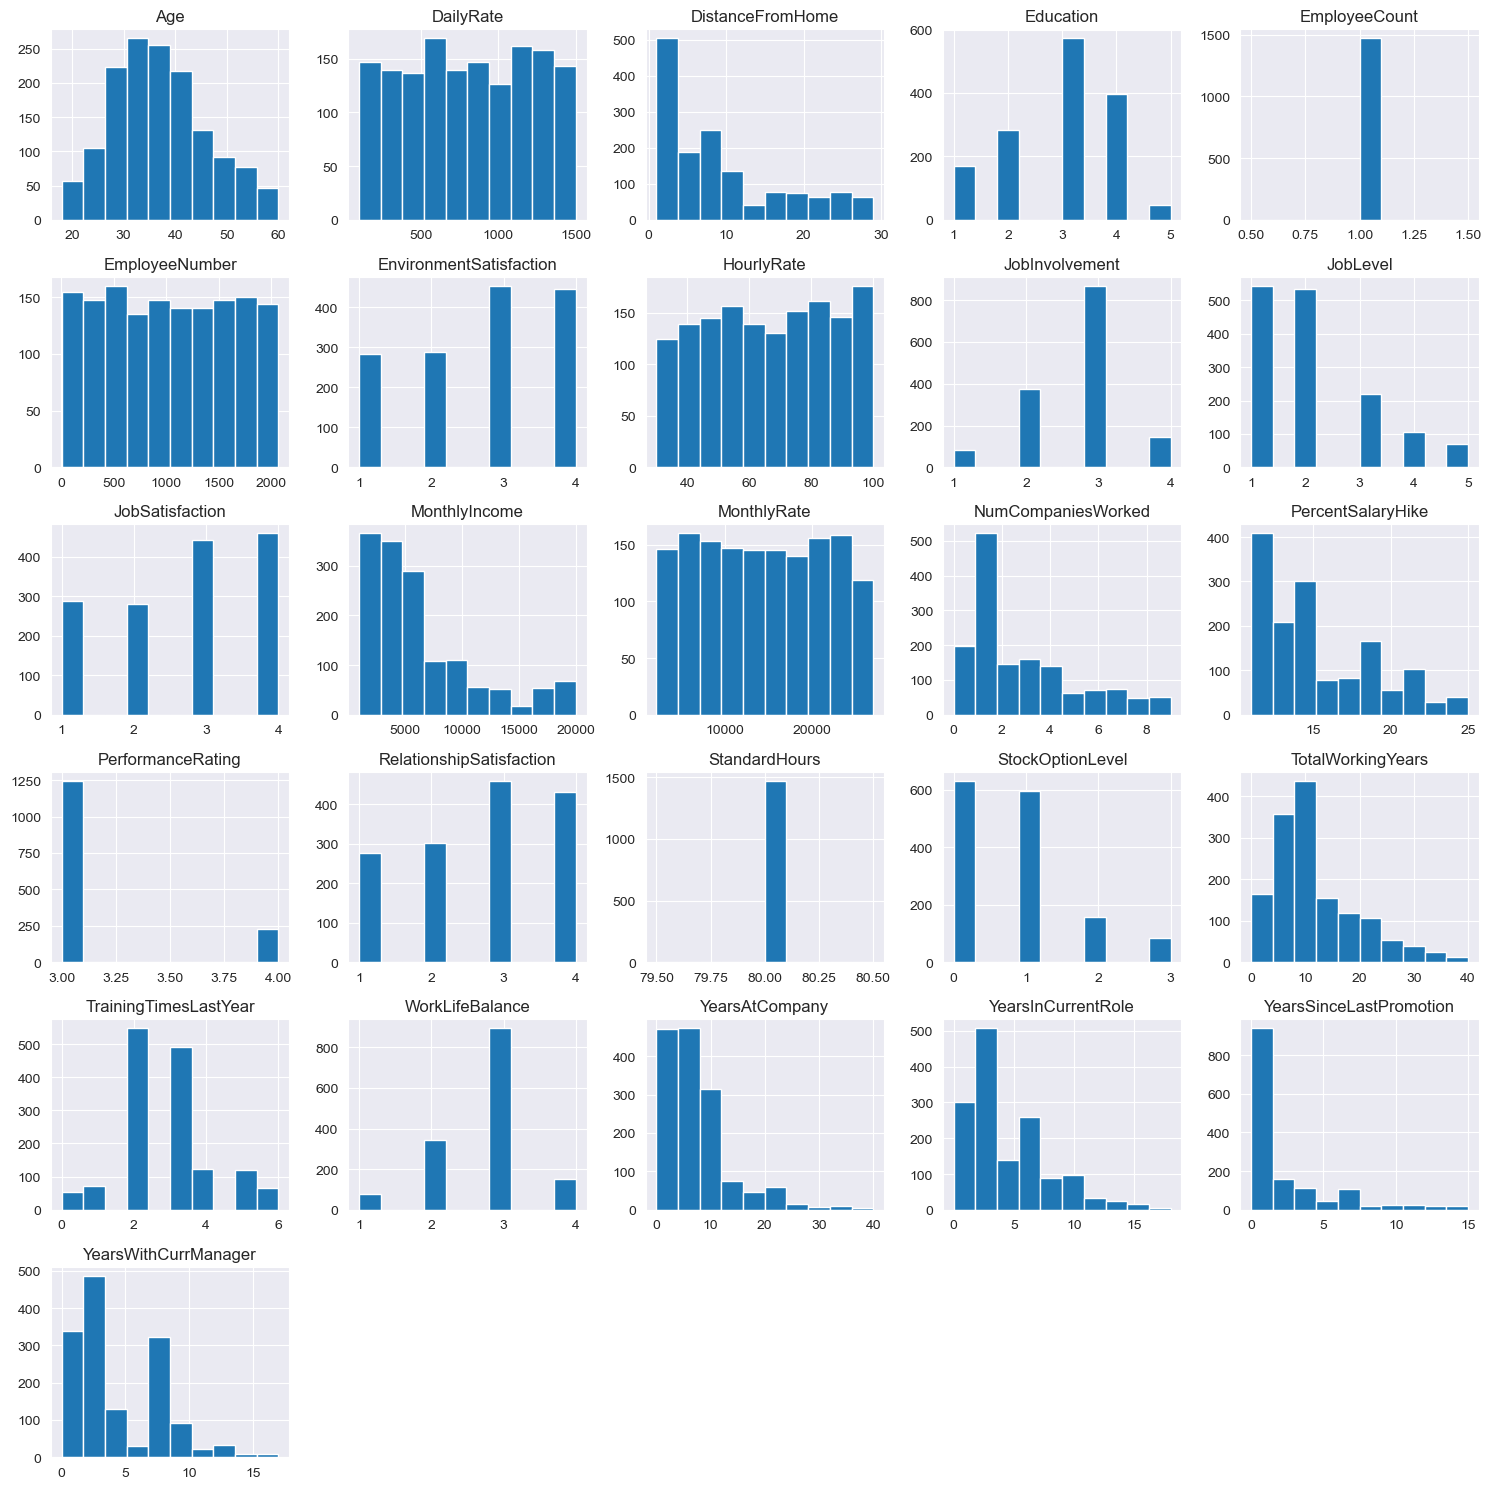

In [25]:
pea_csv.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

### Lets explore age distribution for ex and current employees

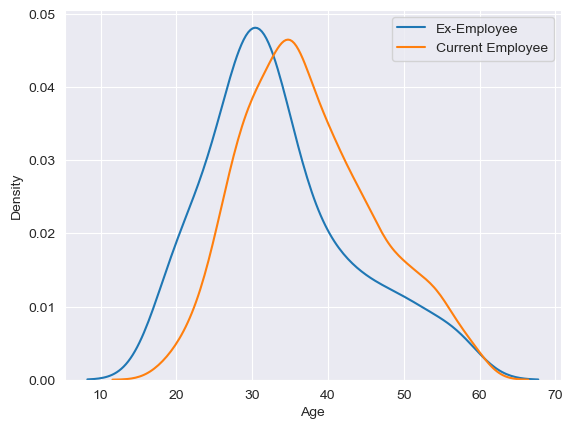

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.kdeplot(pea_csv[pea_csv['Attrition']=='Yes']['Age'],label = 'Ex-Employee')
sns.kdeplot(pea_csv[pea_csv['Attrition']=='No']['Age'],label = 'Current Employee')
plt.legend()
plt.show()

### Lets see whether 'salary' plays a vital role in 'attrition'

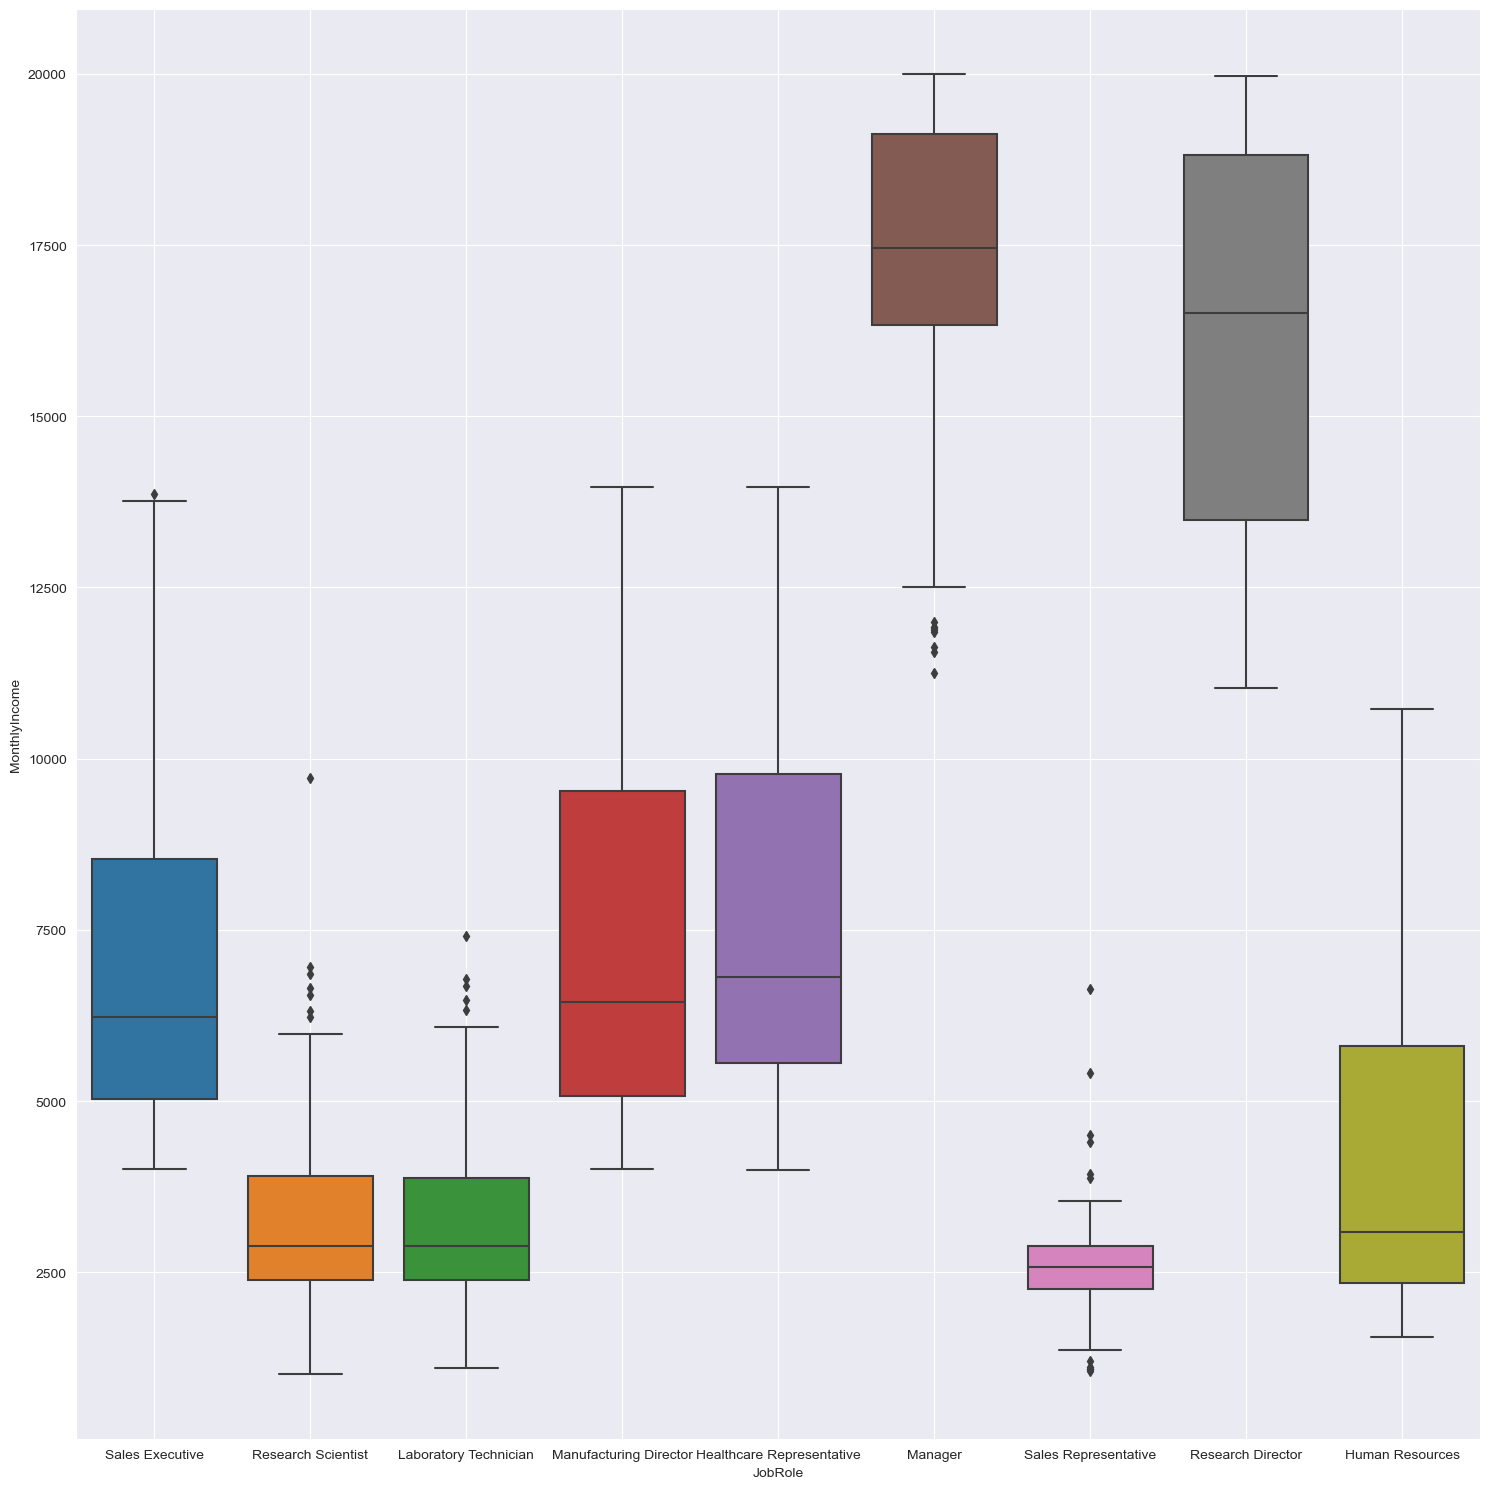

In [30]:
plt.figure(figsize=(15,15))
sns.boxplot(y=pea_csv['MonthlyIncome'],x=pea_csv['JobRole'])
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

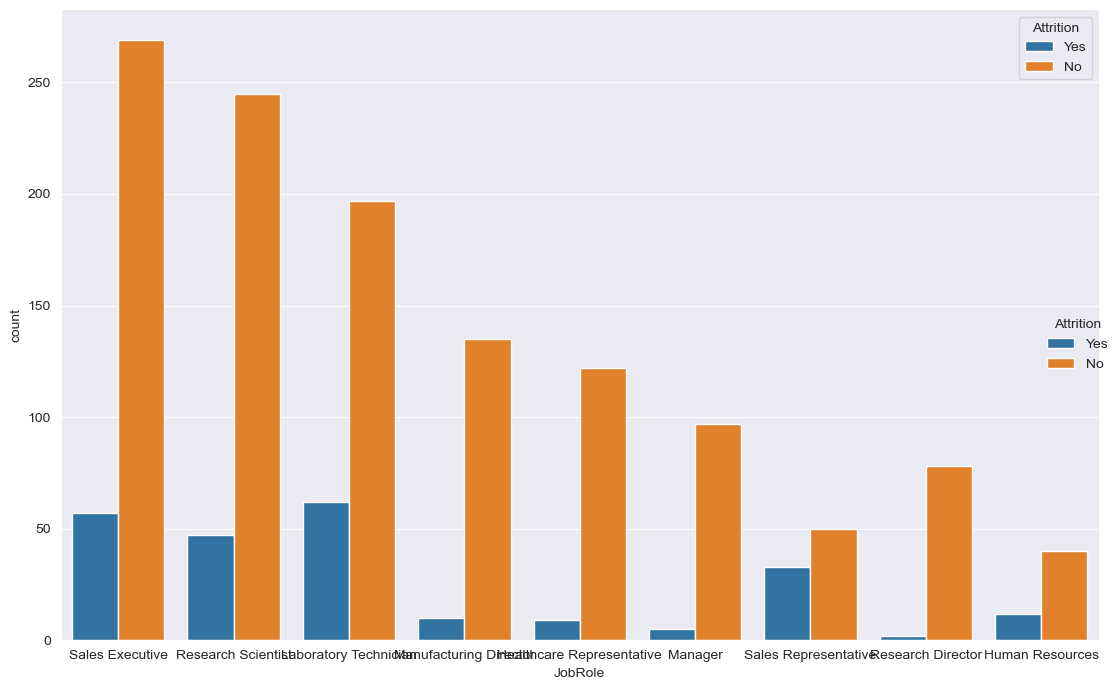

In [35]:
sns.catplot(x='JobRole', hue='Attrition',data=pea_csv,kind='count',height=7,aspect=1.5)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()

### Lets see which department is highly involved in the overtime.

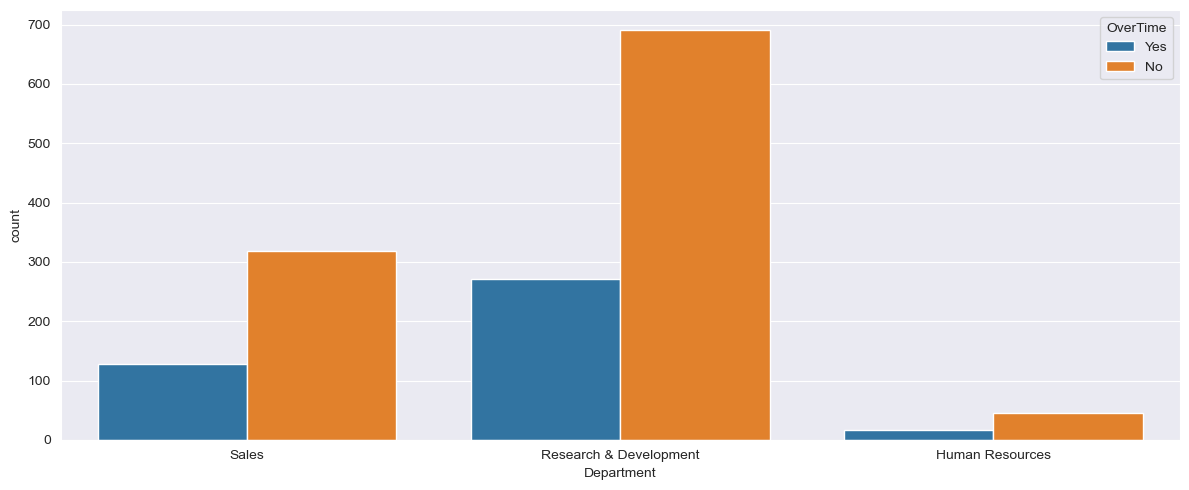

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x=pea_csv['Department'],hue=pea_csv['OverTime'])
plt.tight_layout()

## Data Preprocessing

In [39]:
pea_csv.drop('EmployeeCount', axis = 1, 
			inplace = True) 
pea_csv.drop('StandardHours', axis = 1, 
			inplace = True) 
pea_csv.drop('EmployeeNumber', axis = 1, 
			inplace = True) 
pea_csv.drop('Over18', axis = 1, 
			inplace = True) 

print(pea_csv.shape)


(1470, 31)


### Input and output

In [40]:
y = pea_csv.iloc[:, 1] 
X = pea_csv 
X.drop('Attrition', axis = 1, 
	inplace = True)

### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

### Dummy variable creation

In [44]:
dum_BusinessTravel = pd.get_dummies(pea_csv['BusinessTravel'], prefix ='BusinessTravel') 
  
dum_Department = pd.get_dummies(pea_csv['Department'], prefix ='Department') 
  
dum_EducationField = pd.get_dummies(pea_csv['EducationField'], prefix ='EducationField')

dum_Gender = pd.get_dummies(pea_csv['Gender'], prefix ='Gender', drop_first = True) 
  
dum_JobRole = pd.get_dummies(pea_csv['JobRole'], prefix ='JobRole') 
  
dum_MaritalStatus = pd.get_dummies(pea_csv['MaritalStatus'],  prefix ='MaritalStatus') 
  
dum_OverTime = pd.get_dummies(pea_csv['OverTime'], prefix ='OverTime', drop_first = True) 
  
X = pd.concat([pea_csv, dum_BusinessTravel, dum_Department, 
              dum_EducationField, dum_Gender, dum_JobRole, 
              dum_MaritalStatus, dum_OverTime], axis = 1) 
  
X.drop(['BusinessTravel', 'Department', 'EducationField', 
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], 
       axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape)

(1470, 49)
(1470,)


### Splitting data to training and testing

In [45]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

## Model Execution

In [46]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf.fit(X_train, y_train)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n{}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t{0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t{0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")
    elif not train:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n{}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        print("Accuracy Score: \t{0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")

print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)


Train Result:
------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       978
           1       1.00      0.87      0.93       198

    accuracy                           0.98      1176
   macro avg       0.99      0.93      0.96      1176
weighted avg       0.98      0.98      0.98      1176


Confusion Matrix: 
[[978   0]
 [ 26 172]]

Average Accuracy: 	0.8444
Accuracy SD: 		0.0180
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294


Confusion Matrix: 
[[251   4]
 [ 35   4]]

Accuracy Score: 	0.8673

--------------------------

In [48]:
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

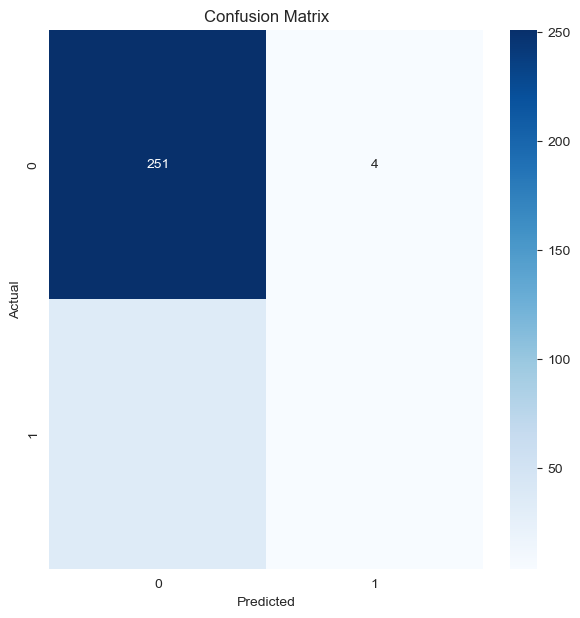

In [49]:
conf_matrix_test = confusion_matrix(y_test, rf.predict(X_test))
plot_confusion_matrix(conf_matrix_test, title='Confusion Matrix')

### Key features for deciding the result

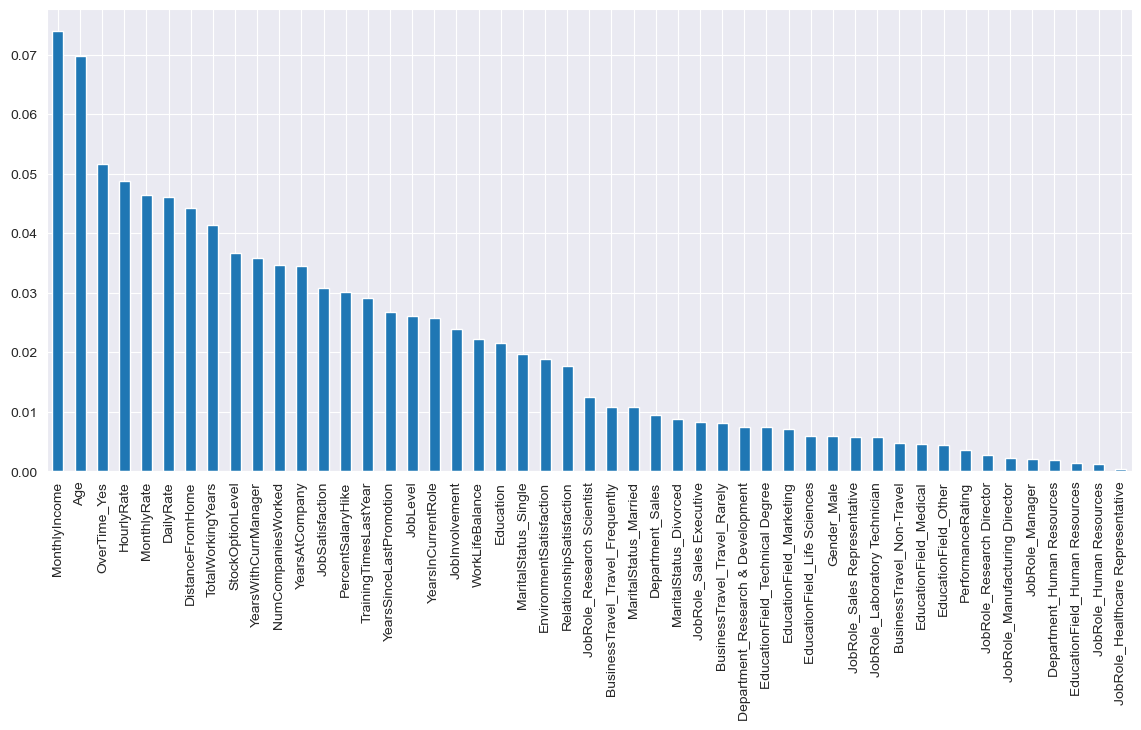

In [50]:
pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6)); 